# Machine Learning with Python

Speaker: Yingzhi Gou

Decision Systems Lab,

University of Wollongong

**NOTE** this jupyter notebook is available on github https://github.com/YingzhiGou/AI-Meetup-Decision-Systems-Lab-UOW


# Acknowledgement

source code in this tutorial is based on the book **Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems** by *Aurélien Géron*

# Understand Training

> **Training** is teaching, or developing in oneself or others, any skills and knowledge that relate to specific useful competencies. Training has specific goals of improving one's capability, capacity, productivity and performance.


* what does it mean for machine learning models?
    * normally involves to find a set of model parameters s.t. the value of a given cost/error function is minimized.
    * one example of the cost functions is Mean Square Error (MSE)


* How do we train a machine learning model?
    * by using a direct "closed-form"equation that directly computes the model parameters that best fit the model to the training examples (training set).
    * using a iterative optimization approach, called Gradient Descent, that gradually tweaks the model parameters to minimize the cost function

# Linear Regression

This model is a linear function of the input features.
Given the input $X = \langle x_1, x_2, \ldots, x_n \rangle$, the linear regression model is defined as,
$$ \hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \ldots + \theta_nx_n $$
where 
* $\hat{y}$ is the predicted value
* $n$ is the number of features (input)
* $x_i$ is the value of the $i^{th}$ feature 
* $\theta_j$ is the $j^{th}$ model parameter
    * $\theta_0$ is the bias term
    * $\theta_1, \theta_2, \ldots, \theta_n$ are the feature weights

Also in vectorized form

$$ \hat{y} = h_{\theta}(X) = \theta^T \cdot X $$

where function $h_\theta$ commonly called hypothesis function using parameter $\theta$.

# Cost Function

Now we need a measure of how well (or poorly) the model fits the training data. 

* A common performance measure of a regression model is Root Mean Square Error (RMSE).
* the goal of the training is to minimize RMSE over training set.
* however, in practice, we simply use Mean Square Error (MSE) which is simpler to calculate.

$$ MSE(X, h_\theta) = \frac{1}{m}\sum_{i=1}^{m}(\theta^T \cdot X^{(i)} - y^{(i)}) ^2 $$

# The Normal Equation

To find $\theta$ that minimize the cost function (MSE), there is a *close-form solution* (recalled the first way of training a model). i.e. there is a mathematical equation that gives the result directly, which is called *Normal Equation*

$$ \hat{\theta} = (\mathbf{X}^T \cdot \mathbf{X})^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y} $$

In [5]:
# prepare some data
import numpy as np

np.random.seed(42)  # only if you want reproduceable result

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

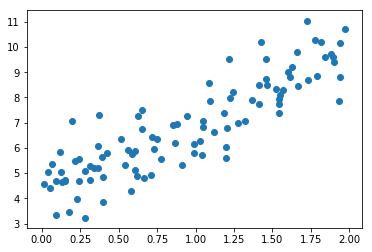

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [13]:
# calculate inverse of the matrix X using inv() function
# from NumPy's Linear Algebra module
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 for each instance (why? hint \theta_0 the bias term)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

$$ \hat{\theta} = (\mathbf{X}^T \cdot \mathbf{X})^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y} $$

In [15]:
print(theta_best)

[[ 4.21509616]
 [ 2.77011339]]


In [17]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 4.21509616]
 [ 9.75532293]]


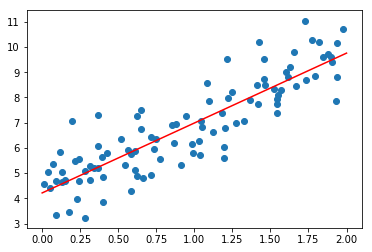

In [19]:
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")

In [20]:
# using Scikit-learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(lin_reg.intercept_, lin_reg.coef_)

[ 4.21509616] [[ 2.77011339]]


In [21]:
lin_reg.predict(X_new)

array([[ 4.21509616],
       [ 9.75532293]])

which is the same result.

## However ...

Normal Equation computes the inverse of $X^T \cdot X$, which is an $n\times n$ matrix (where $n$ is the number of features. The *computational complexity* of inverting such a matrix is about $O(n^{2.4})$ to $O(n^{3})$. 

However, again, this equation is linear with the number of training examples so it can handle large training sets efficiently, given that all the training data can fit in memory.

# Gradient Descent

*Gradient Descent* is a very generic optimization algorithm capable of finding (sometimes local) optimal solutions. 

<img src=https://www.safaribooksonline.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0402.png\>